# Equações Diferenciais Parciais

Para mais informações, consultar a referência:

- Mark Newman: Computational Physics

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Problemas de valor de contorno e método da relaxação

Método das diferenças finitas (ou **método de Jacobi**) para resolver a Equação de Laplace 

$$
\frac{\partial^2 \phi}{\partial x^2} + \frac{\partial^2 \phi}{\partial y^2} = 0
$$

#### Exemplo 9.1 (p. 409)

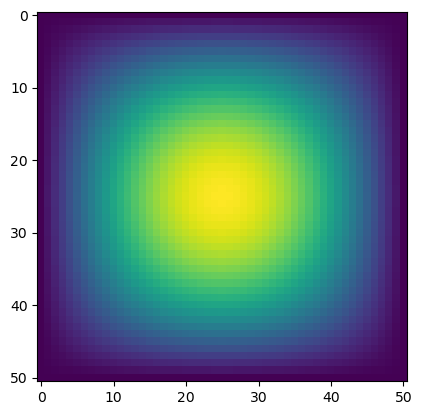

In [2]:
M = 50
V = 1.
target = 1e-6

phi = np.zeros([M+1, M+1], float)
#phi[0,:] = V
phi[1:M,1:M] = V

phiprime = np.zeros([M+1, M+1], float)


delta = 1.

while delta>target:
    
    for i in range(M+1):
        for j in range(M+1):
            if i ==0 or i==M or j==0 or j==M:
                phiprime[i,j] = phi[i,j]
            else:
                phiprime[i,j] = (phi[i+1,j] + phi[i-1,j]
                                 + phi[i,j+1] + phi[i,j-1])/4
                
    delta = abs((phi-phiprime)).max()
    
    phi, phiprime = phiprime, phi
                                 
                    
                    
plt.imshow(phi)

#### Exemplo 9.1 (p. 409) - Versão Livro

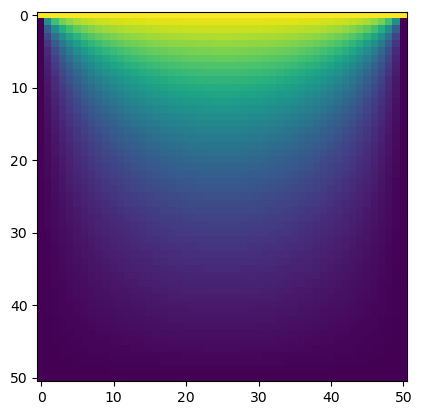

In [3]:
M = 50
V = 1.
target = 1e-6

phi = np.zeros([M+1, M+1], float)
phi[0,:] = V
#phi[1:M,1:M] = V

phiprime = np.zeros([M+1, M+1], float)


delta = 1.

while delta>target:
    
    for i in range(M+1):
        for j in range(M+1):
            if i ==0 or i==M or j==0 or j==M:
                phiprime[i,j] = phi[i,j]
            else:
                phiprime[i,j] = (phi[i+1,j] + phi[i-1,j]
                                 + phi[i,j+1] + phi[i,j-1])/4
                
    delta = abs((phi-phiprime)).max()
    
    phi, phiprime = phiprime, phi
                                 
                    
                    
plt.imshow(phi)

#### Exemplo 9.1 (p. 409) - Cargas na placa

Tempo gasto: 185.00810432434082 segundos


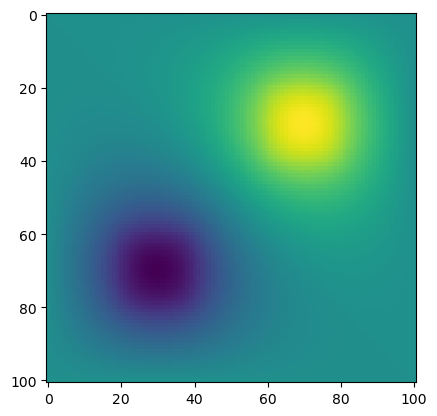

In [4]:
import time
start_time = time.time()
M = 100
V = 1
target = 1e-6
epsilon0 = 1
rho1 = 1
rho2 = -1

# a1, b1 = (30, 40)
# a2,b2 = (10,20)

phi = np.zeros([M+1, M+1], float)
phi[60:80,20:40] = 1
phi[20:40,60:80] = -1



phiprime = np.zeros([M+1, M+1], float)


delta = 1.

while delta>target:
    
    for i in range(M):
        for j in range(M):
            if 20<=i<=40 and 60<=j<=80:
                phiprime[i,j] = (phi[i+1,j] + phi[i-1,j] + phi[i,j+1] + phi[i,j-1]-rho2/epsilon0)/4
            elif 20<=j<=40 and 60<=i<=80:
                phiprime[i,j] = (phi[i+1,j] + phi[i-1,j] + phi[i,j+1] + phi[i,j-1]-rho1/epsilon0)/4
            else:
                phiprime[i,j] = (phi[i+1,j] + phi[i-1,j] + phi[i,j+1] + phi[i,j-1])/4
                
    delta = abs((phi-phiprime)).max()
    
    phi, phiprime = phiprime, phi
                                 
                
plt.imshow(phi, 'viridis')

end_time = time.time()


print('Tempo gasto:', end_time - start_time,'segundos')

## Métodos mais rápidos de problemas de valor inicial

### Método de Gauss-Seidel com Overrelaxation (p. 415)

#### 9.2 - Exercicio da placa sem carga

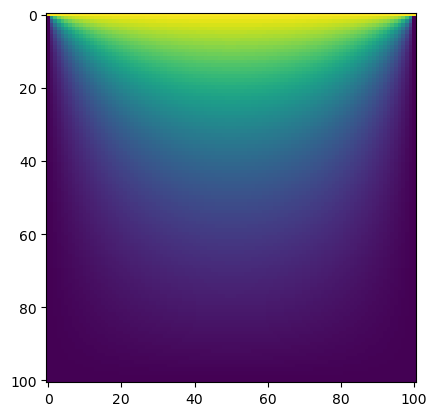

In [5]:
M = 100
V = 1.
target = 1e-6

phi = np.zeros([M+1, M+1], float)
phi[0,:] = V
#phi[1:M,1:M] = V


delta = 1.
omega = 0.9

while delta>target:
    old = np.max(np.abs(phi[1:M,1:M]))
    for i in range(M+1):
        for j in range(M+1):
            if i ==0 or i==M or j==0 or j==M:
                phi[i,j] = phi[i,j]
            else:
                phi[i,j] = (1+omega)*(phi[i+1,j] + phi[i-1,j] + phi[i,j+1] + phi[i,j-1])/4 - omega*phi[i,j]
    
    new = np.max(np.abs(phi[1:M,1:M]))
    delta = np.abs(old-new)
                    
plt.imshow(phi)

#### 9.2 - Cargas na placa

Muito mais rápido que o feito anteriormente!

Tempo Gasto: 6.434245824813843 segundos


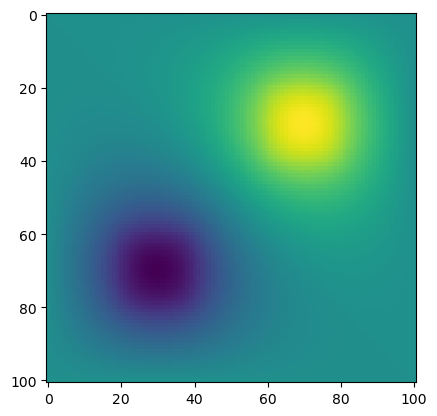

In [6]:
import time
start_time = time.time()
M = 100
V = 1
target = 1e-6
epsilon0 = 1
rho1 = 1
rho2 = -1

a1, b1 = (60, 80)
a2,b2 = (20,40)

phi = np.zeros([M+1, M+1], float)
phi[a1:b1,a2:b2] = 1
phi[a2:b2,a1:b1] = -1



delta = 1.
omega = 0.9
while delta>target:
    old = np.max(np.abs(phi[1:M,1:M]))
    for i in range(M):
        for j in range(M):
            if a2<=i<=b2 and a1<=j<=b1:
                phi[i,j] = (1+omega)*(phi[i+1,j] + phi[i-1,j] + phi[i,j+1] + phi[i,j-1]-rho2/epsilon0)/4 - omega*phi[i,j]
            elif a2<=j<=b2 and a1<=i<=b1:
                phi[i,j] = (1+omega)*(phi[i+1,j] + phi[i-1,j] + phi[i,j+1] + phi[i,j-1]-rho1/epsilon0)/4 - omega*phi[i,j]
            else:
                phi[i,j] = (1+omega)*(phi[i+1,j] + phi[i-1,j] + phi[i,j+1] + phi[i,j-1])/4 - omega*phi[i,j]
    
    new = np.max(np.abs(phi[1:M,1:M]))
    delta = np.abs(old-new)
                                 
                
plt.imshow(phi,'viridis')

end_time = time.time()


print('Tempo Gasto:', end_time - start_time, 'segundos')